可以使用sklearn中的PolymonialFeatures类来实现非线性回归
思路：
>使用PolynomialFeatures类中的fit_transform()方法将原本的数据变成多项式特征

>再用多项式特征去进行线性回归

下面给出一个例子

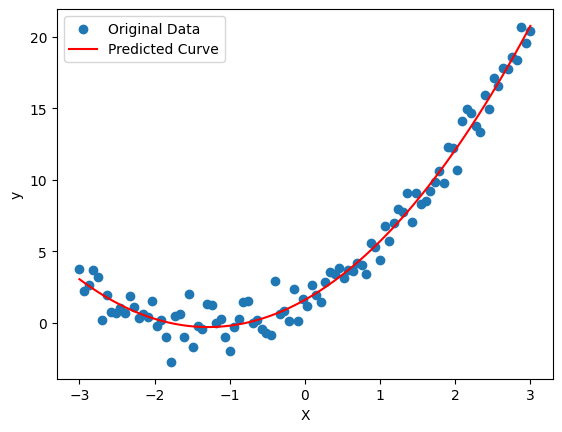

In [17]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 创建样本数据
np.random.seed(0)
X = np.linspace(-3, 3, 100)  # 创建从-3到3的100个样本点
y = 2 + 3*X + X**2 + np.random.normal(0, 1, 100)  # y = 2 + 3X + X^2 + 噪声

# 转换特征为多项式特征
poly = PolynomialFeatures(degree=2)  # 使用2次多项式
X_poly = poly.fit_transform(X.reshape(-1, 1))  # 将X转换为多项式特征

# 创建并训练模型
model = LinearRegression()
model.fit(X_poly, y)

# 预测
X_test = np.linspace(-3, 3, 100)  # 创建测试数据
X_test_poly = poly.transform(X_test.reshape(-1, 1))  # 将测试数据转换为多项式特征
y_pred = model.predict(X_test_poly)  # 做出预测

# 绘制原始数据和预测曲线
plt.scatter(X, y, label='Original Data')
plt.plot(X_test, y_pred, color='r', label='Predicted Curve')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

使用world-happiness-report进行实验

In [18]:
import pandas as pd
# 导入数据
data = pd.read_csv('dataset/world-happiness-report.csv')

train_data = data.sample(frac=0.75)
test_data=data.drop(train_data.index)

input_param_index = ['GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']
output_param_index = 'Happiness score'

x_train = [train_data[x].values for x in input_param_index]
x_train = np.array(x_train)
for i in range(x_train.shape[0]):
    x_train[i] = (x_train[i]-np.min(x_train[i]))/(np.max(x_train[i])-np.min(x_train[i]))
x_train = x_train.T

x_test = [test_data[x].values for x in input_param_index]
x_test = np.array(x_test)
for i in range(x_test.shape[0]):
    x_test[i] = (x_test[i]-np.min(x_test[i]))/(np.max(x_test[i])-np.min(x_test[i]))
x_test = x_test.T

y_train = train_data[output_param_index].values
y_test = test_data[output_param_index].values

13.07334221362305


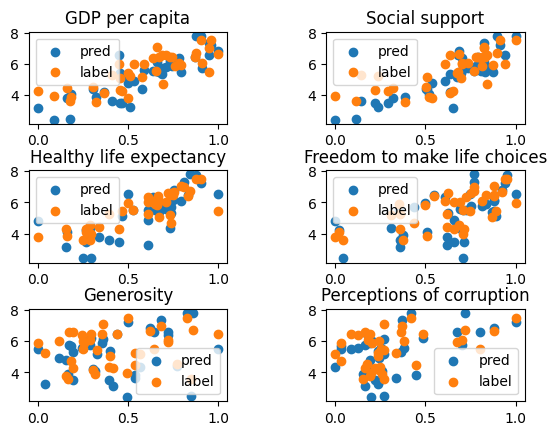

In [19]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

new_model = LinearRegression()
new_model.fit(x_train_poly,y_train)
y_pred = new_model.predict(x_test_poly)

loss = y_pred-y_test
loss = 0.5*loss*loss
loss = np.sum(loss)
print(loss)
x_data = x_test.T
fig, ax = plt.subplots(3,2)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(0,3):
    for j in range(0,2):
        index = i*2+j
        ax[i][j].set_title(input_param_index[index])
        ax[i][j].scatter(np.sort(x_data[index]),y_pred[np.argsort(x_data[index])],label='pred')
        ax[i][j].scatter(x_data[index],y_test,label='label')
        ax[i][j].legend()

下面来实现非线性回归中的polynomialFeatures

In [20]:
class myPolynomialFeatures:
    def __init__(self, degree=2):
        self.degree=degree
    def fit_transform(self,data):
        num_samples, num_features = data.shape
        X_poly = [[] for i in range(num_samples)]
        for i in range(num_samples):
            X_poly[i]=data[i][:]
            print(X_poly[i])
            for j in range(num_features):
                for k in range(j,num_features):
                    np.append(X_poly[i],data[i][j]*data[i][k])
            X_poly[i] = np.array(X_poly[i])
        X_poly=np.array(X_poly)
        return X_poly

x = np.array([[1,2,3],[2,3,4],[3,4,5]])

model = myPolynomialFeatures(degree=2)
x_poly=model.fit_transform(x)
print(x)
print(x_poly)

[1 2 3]
[2 3 4]
[3 4 5]
[[1 2 3]
 [2 3 4]
 [3 4 5]]
[[1 2 3]
 [2 3 4]
 [3 4 5]]


In [34]:
import numpy as np
import itertools
class newPolynomialFeatures:
    def __init__(self, degree=2):
        self.degree = degree
    
    def fit_transform(self, X):
        
        n_samples, n_features = X.shape
        X_poly = np.ones((n_samples, 1))
        
        for d in range(1, self.degree + 1):
            combinations = itertools.combinations_with_replacement(range(n_features), d)

            for comb in combinations:
                new_feature = np.prod(X[:, comb], axis=1).reshape(-1, 1)
                X_poly = np.hstack((X_poly, new_feature))
        
        return X_poly[:, 1:]

In [32]:
model = newPolynomialFeatures(degree=2)
x_poly=model.fit_transform(x)
print(x)
print(x_poly)

[[1.]
 [1.]
 [1.]]
[[1 2 3]
 [2 3 4]
 [3 4 5]]
[[ 1.  2.  3.  1.  2.  3.  4.  6.  9.]
 [ 2.  3.  4.  4.  6.  8.  9. 12. 16.]
 [ 3.  4.  5.  9. 12. 15. 16. 20. 25.]]


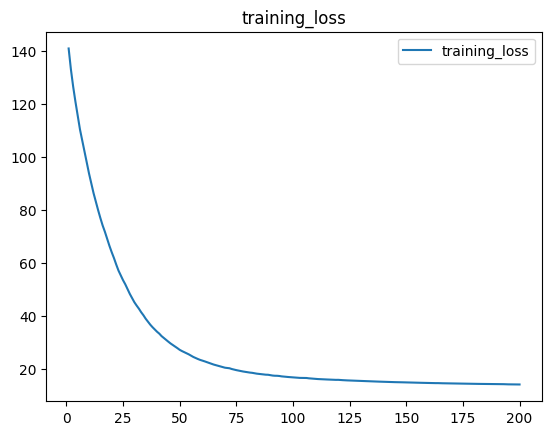

9.971750965387203


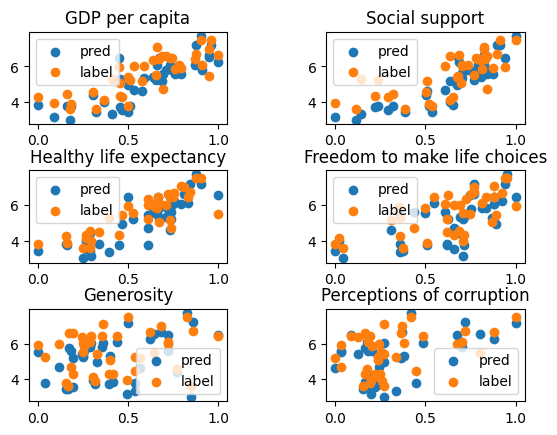

In [47]:
poly = newPolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

new_model = LinearRegression(num_iterations=2000,batch_size=32)
new_model.fit(x_train_poly,y_train)
y_pred = new_model.predict(x_test_poly)

loss = y_pred-y_test
loss = 0.5*loss*loss
loss = np.sum(loss)
print(loss)
x_data = x_test.T
fig, ax = plt.subplots(3,2)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(0,3):
    for j in range(0,2):
        index = i*2+j
        ax[i][j].set_title(input_param_index[index])
        ax[i][j].scatter(np.sort(x_data[index]),y_pred[np.argsort(x_data[index])],label='pred')
        ax[i][j].scatter(x_data[index],y_test,label='label')
        ax[i][j].legend()